# import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
mat = np.matrix([['Oui', 'Souvent'],['Non', 'Jamais'],
                   ['Oui', 'Rarement'],['Oui', 'Toujours'],
                   ['Non', 'Jamais'],['Oui', 'Souvent'],
                   ['Oui', 'Souvent'],['Oui', 'Toujours'],
                   ['Non', 'Jamais'],['Oui', 'Souvent'],
                   ['Oui', 'Rarement'],['Oui', 'Souvent']])

df = pd.DataFrame(mat, columns=['rep1', 'rep2'], index = ['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12'])
Rep1 = np.array(["O","N"])

Rep2 = ["J","R","S","T"]
rep1 = np.array(mat[:,0]) # CONTAINS THE FIRST RESPOND
rep2 = np.array(mat[:,1]) # CONTAINS THE SECOND RESPOND

# SELECTING THE VARIABLES OF EACH ARRAY
unRep1 = np.unique(rep1) # CONTAINS YES AND NO
unRep2 = np.unique(rep2) # CONTAINS THE OTHER VARIABLES
# np.unique() STORE THE VARIABLES IN AN ALPHABET ORDER 

# THE SIZE OF EACH ARRAY
s1 = unRep1.shape[0]
s2 = unRep2.shape[0]

# THE CODING OF EACH ARRAY
code1 = np.eye(s1,s1)
code2 = np.eye(s2,s2)

# SINCE THE SECOND RESPONDS ARE ORDINAL VARIABLES THE CODING TYPE MUST CHANGE
code2O = code2.copy() # USING ANOTHER VARIABLE TO USE THE PREVIOUS ONE AGAIN
for i in range(code2O.shape[0]):
    if code2O[i,i] == 1:
        code2O[i,:i] = 1

# CREATING THE COMPLETE DISJONCTIF TABLE 
tab_disj_comp = np.zeros((mat.shape[0],code1.shape[0] + code2.shape[0]), dtype=int)

for row in range(mat.shape[0]):
    for col in range(mat.shape[1]):
        for i in range(unRep1.shape[0]):
            if mat[row,col] == unRep1[i]:
                tab_disj_comp[row,:unRep1.shape[0]] = code1[i,:]
        for j in range(unRep2.shape[0]):
            if mat[row,col] == unRep2[j]:
                tab_disj_comp[row,-unRep2.shape[0]:] = code2O[j,:]

# THE DISJONCTIF TABLE WITHOUT TAKING THE ORDER INTO ACCOUNT
tab_disj = tab_disj_comp.copy()

for row in range(mat.shape[0]):
    for col in range(mat.shape[1]):
        for j in range(unRep2.shape[0]):
            if mat[row,col] == unRep2[j]:
                tab_disj[row,-unRep2.shape[0]:] = code2[j,:]
                
# TRANSFORMING THE COMPLETE DISJONCTIF TABLE INTO A DATAFRAME               
tabDC = pd.DataFrame(tab_disj_comp, index=["p{}".format(i) for i in range(1,13)], columns=["Non","Oui","Jamais","Rarement","Souvent","Toujours"])
# TRANSFORMING THE DISJONCTIF TABLE INTO A DATAFRAME 
tabD = pd.DataFrame(tab_disj, index=["p{}".format(i) for i in range(1,13)], columns=[["rep1","rep1","rep2","rep2","rep2","rep2"],
                                                                                     ["Non","Oui","Jamais","Rarement","Souvent","Toujours"]])

tabD

rep1       rep2                          
     Non Oui Jamais Rarement Souvent Toujours
p1     0   1      0        0       1        0
p2     1   0      1        0       0        0
p3     0   1      0        1       0        0
p4     0   1      0        0       0        1
p5     1   0      1        0       0        0
p6     0   1      0        0       1        0
p7     0   1      0        0       1        0
p8     0   1      0        0       0        1
p9     1   0      1        0       0        0
p10    0   1      0        0       1        0
p11    0   1      0        1       0        0
p12    0   1      0        0       1        0

**BEFORE RUNNING THIS CELL MAKE SURE TO RUN THE PREVIOUS ONE**

REDUCTION OF THE CODED TABLE

In [14]:
# print("\nComplete Disjunctive Table:\n")
# print(tabDC,"\n") 

# print("Disjunctive Table (eliminating the order notion):\n")
# print(tabD)
#-------------------------------------------------------------------------------------------------------

TBurt_df = pd.DataFrame(columns = tabD.columns ,index = tabD.columns)
TBurt_df = tabD.T.dot(tabD)    # tableau de burt = X(transpose) * X

print("\nBurt matrix:\n")
print(TBurt_df,"\n")




Burt matrix:

              rep1       rep2                          
               Non Oui Jamais Rarement Souvent Toujours
rep1 Non         3   0      3        0       0        0
     Oui         0   9      0        2       5        2
rep2 Jamais      3   0      3        0       0        0
     Rarement    0   2      0        2       0        0
     Souvent     0   5      0        0       5        0
     Toujours    0   2      0        0       0        2 



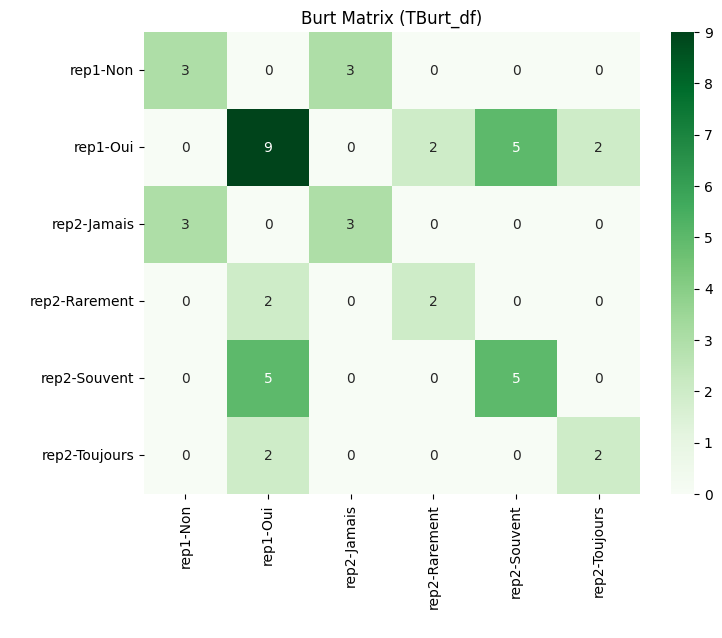

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(TBurt_df, annot=True, cmap="Greens", cbar=True)
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("Burt Matrix (TBurt_df)")
plt.show()

**CONTINGENCY TABLE**

In [ ]:
Tcontigence_df = TBurt_df.loc[['rep1'],['rep2']]
print('Contingence table')
print(Tcontigence_df)

Contingence table
           rep2                          
         Jamais Rarement Souvent Toujours
rep1 Non      3        0       0        0
     Oui      0        2       5        2


2

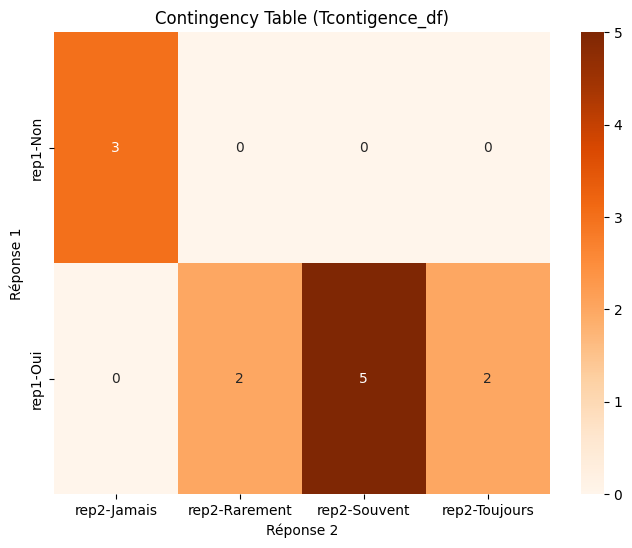

In [17]:

#visualization
plt.figure(figsize=(8, 6))
sns.heatmap(Tcontigence_df, annot=True, cmap="Oranges", cbar=True)
plt.title("Contingency Table (Tcontigence_df)")
plt.xlabel("Réponse 2")
plt.ylabel("Réponse 1")
plt.show()



# frequency table

In [18]:

Tfrequence_df = Tcontigence_df.copy()
nbrtotal = Tcontigence_df.values.sum()
Tfrequence_df = Tcontigence_df/nbrtotal
Tfrequence_df['fi.'] = Tfrequence_df.sum(axis=1)
Tfrequence_df.loc['f.j'] = Tfrequence_df.sum(axis=0)
Tfrequence_df[:] = Tfrequence_df[:].round(2)
Tfrequence_df


rep2                             fi.
            Jamais Rarement Souvent Toujours      
(rep1, Non)   0.25     0.00    0.00     0.00  0.25
(rep1, Oui)   0.00     0.17    0.42     0.17  0.75
f.j           0.25     0.17    0.42     0.17  1.00

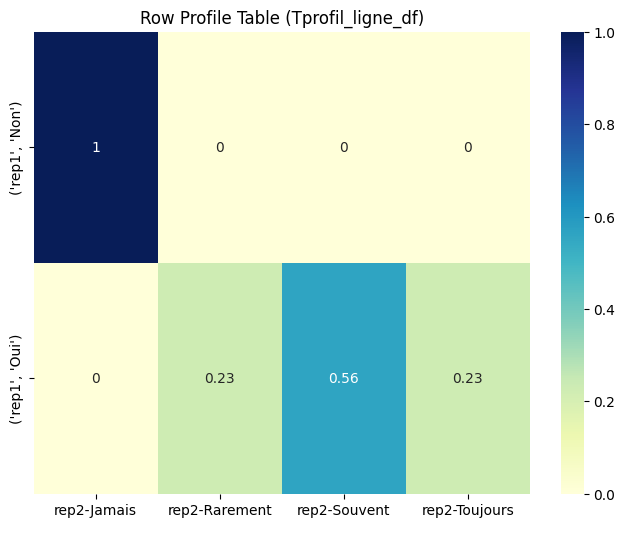

In [19]:
#tableau de profile ligne FJi

Tprofil_ligne_df = Tfrequence_df.copy()
Tprofil_ligne_df.drop(index ='f.j' ,inplace = True)
Tprofil_ligne_df = Tprofil_ligne_df.div(Tprofil_ligne_df['fi.'], axis = 0)
Tprofil_ligne_df[:] = Tprofil_ligne_df[:].round(2)
Tprofil_ligne_df.drop(columns ='fi.' ,inplace = True)

#visualization
plt.figure(figsize=(8, 6))
sns.heatmap(Tprofil_ligne_df, annot=True, cmap="YlGnBu", cbar=True)
plt.xlabel(" ")
plt.title("Row Profile Table (Tprofil_ligne_df)")
plt.show()

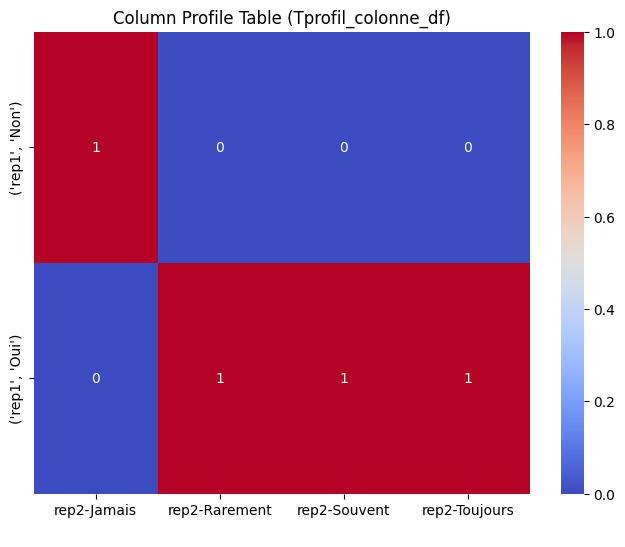

In [20]:

#tableau de profile colonne FIj

Tprofil_colonne_df = Tfrequence_df.copy()
Tprofil_colonne_df.drop(columns ='fi.' ,inplace = True)
Tprofil_colonne_df = Tprofil_colonne_df.div(Tprofil_colonne_df.loc['f.j'], axis = 1)
Tprofil_colonne_df[:] = Tprofil_colonne_df[:].round(2)
Tprofil_colonne_df.drop(index ='f.j' ,inplace = True)

#visualization
plt.figure(figsize=(8, 6))
sns.heatmap(Tprofil_colonne_df, annot=True, cmap="coolwarm", cbar=True)
plt.xlabel(" ")
plt.title("Column Profile Table (Tprofil_colonne_df)")
plt.show()


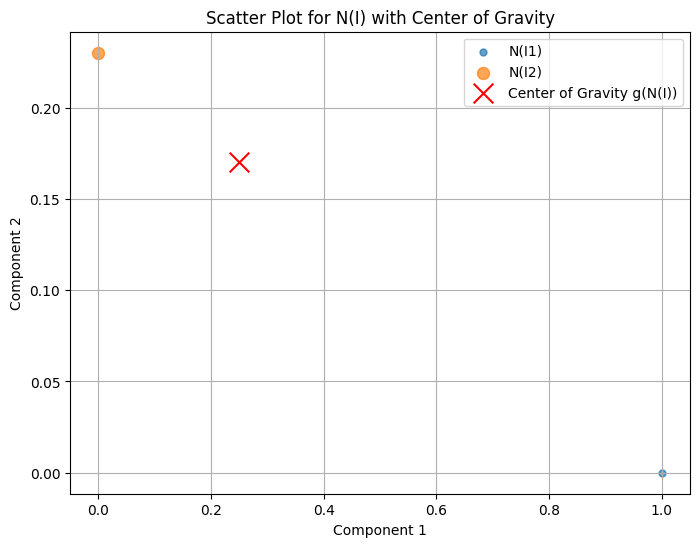

In [21]:
#les nuages de points N(I)
vectors_tpl = Tprofil_ligne_df.values     #getting the values without the values of weights
weights_tpl = Tfrequence_df.drop(index = 'f.j')['fi.'].values

NI = [(vectors_tpl[i],weights_tpl[i]) for i in range (len(weights_tpl))]


# Affichage de N(I) in pairs; here NI contains tuples eg NI = [([0.2, 0.3, 0.1], 1.0), ([0.4, 0.1, 0.3], 1.0)]   N(I1) = ([0.2, 0.3, 0.1], 1.0)
#for i, ni in enumerate(NI):
#    print(f"N(I{i+1}) = {ni}")  # ni is a tuple ([vector],weight)


# le centre de gravite du nuage  g N(I)=f.j  
gNI = Tfrequence_df.loc['f.j'].values
#print(f"Centre de gravité du nuage g N(I): {gNI}")

#visualisation de N(I)
plt.figure(figsize=(8, 6))
for i, (vector, weight) in enumerate(NI):
    plt.scatter(vector[0], vector[1], s=100 * weight, label=f"N(I{i+1})", alpha=0.7)

plt.scatter(gNI[0], gNI[1], color="red", marker="x", s=200, label="Center of Gravity g(N(I))")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Scatter Plot for N(I) with Center of Gravity")
plt.legend()
plt.grid()
plt.show()

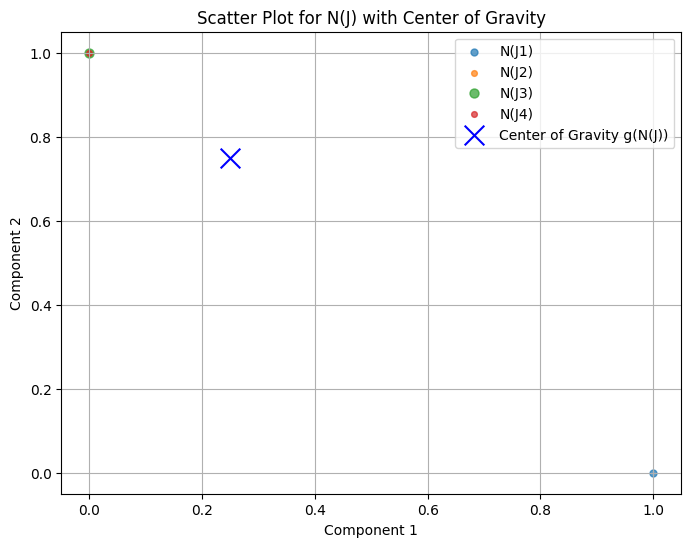

In [22]:
#------------------------------------------------------------------------------------
#les nuages de points N(J)

vectors_tpc = Tprofil_colonne_df.values
weights_tpc = Tfrequence_df.drop(columns= 'fi.').loc['f.j'].values

NJ = [(vectors_tpc[:,j] , weights_tpc[j])  for j in range(len(weights_tpc))]

# Affichage de N(J) in pairs 

#for j ,nj in enumerate(NJ):
#    print(f"N(J{j+1})={nj}")


# le centre de gravite du nuage  g N(J)=fi. 
gNJ = Tfrequence_df['fi.'].values

#print(f"Centre de gravite du nuage g N(J)={gNJ}")

# Visualize N(J) with scatter plot
plt.figure(figsize=(8, 6))
for j, (vector, weight) in enumerate(NJ):
    plt.scatter(vector[0], vector[1], s=100 * weight, label=f"N(J{j+1})", alpha=0.7)

plt.scatter(gNJ[0], gNJ[1], color="blue", marker="x", s=200, label="Center of Gravity g(N(J))")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Scatter Plot for N(J) with Center of Gravity")
plt.legend()
plt.grid()
plt.show()